**this is a template notebook for Assignment 4 on Recommendation. To get a 60 you will need to complete chapter 1.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>\<Book recommendations>
Author: <span style='background:yellow'>\<Jaimy Monsuur\></span><br>
Student number: <span style='background:yellow'>\<668040\></span><br>
Date: <span style='background:yellow'>\<12/04/2023\></span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* **\<add other packages\>**

From these we will need the following libraries:

In [1]:
# enter here all those 'from .... import ....'
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')

# pandas as pd
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')

# matplotlib
try:
    import matplotlib
    print('matplotlib already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib
    print('matplotlib was not installed, installed and imported')

NumPy already installed, only imported
pandas already installed, only imported


# 1. The Item-Based Recommender

We are going to build an item-based recommender for **<span style='background:yellow'>\<Books></span>**. In this recommender we could for example **<span style='background:yellow'>\<give a brief description of an example how your recommender would work></span>**.

the recomender will work by merging my two datasets: BX-books and BX-book-ratings,then it will create a separate list that contains the books and the number of ratings that they have. Then i will make a pivot table.

the last step would be to calculate the correlation between a given book and then make a recommendation for the given book.

Correlation refers to the statistical relationship between two variables. When two variables are correlated, it means that there is a connection or pattern between them. We can use a positive correlation to make a recommendation because it means that the two variables are moving in the same direction. If the correlation is negative, it means that the two variables are moving in opposite directions so we cant use it to recommend a book. but we could use it to give a negative recommendation. it could be to discourage a book based on on the fact that it is not similar to a book they liked before.

To begin we'll need to load some data.

In [2]:
# enter code to load your example data file(s)
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='latin-1', error_bad_lines=False, warn_bad_lines=False, low_memory=False)
ratings.head()


C:\Users\jaimy\AppData\Local\Temp\ipykernel_29248\3373478872.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='latin-1', error_bad_lines=False, warn_bad_lines=False, low_memory=False)
C:\Users\jaimy\AppData\Local\Temp\ipykernel_29248\3373478872.py:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='latin-1', error_bad_lines=False, warn_bad_lines=False, low_memory=False)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [3]:
books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', error_bad_lines=False, warn_bad_lines=False, low_memory=False)
books.head()

C:\Users\jaimy\AppData\Local\Temp\ipykernel_29248\2975918476.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', error_bad_lines=False, warn_bad_lines=False, low_memory=False)
C:\Users\jaimy\AppData\Local\Temp\ipykernel_29248\2975918476.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', error_bad_lines=False, warn_bad_lines=False, low_memory=False)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


**<span style='background:yellow'>\<explain a bit about the data file(s), if you have multiple and need to merge them, use the code cell below></span>**

i have two files with data in them one is a file with ratings of hte books, in contains the user id, the isbn of the book and the rating. The other file contains the isbn of the book, the title, the author and the year of publication. I will merge the two files on the isbn column.

In [4]:
# Optional depending on your dataset, enter code to select appropriate columns, and merge the files.
ratings = ratings[['User-ID', 'ISBN', 'Book-Rating']]
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication']]

df = pd.merge(ratings, books, on='ISBN')
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002


We need one row per user, and his/her scores for each **<span style='background:yellow'>\<BOOK></span>**. We can do this by creating a pivot table.

In [39]:
#the dataset is too big to work with so i will take a sample of 10000
df.dropna(inplace=True)
df = df.head(10000)

# code to create pivot table
book_pivot = df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
book_pivot.head()


Book-Title,007 El Mundo Nunca Es Suficiente,4000 Vornamen aus aller Welt. Von Alexander bis Zoe.,A Kid's Guide to How to Save the Planet (Camelot world),A Kiss of Shadows (Meredith Gentry Novels (Paperback)),A Painted House,A String in the Harp,A Wrinkle In Time,Adressat unbekannt.,"Advanced Photography, Sixth Edition",Alaska,...,Waiting to Exhale,Walk Two Moons,Was Mir Wichtig War: Letzte Aufzeichnungen Und Gesprache,Wasted : A Memoir of Anorexia and Bulimia,What's That Pig Outdoors: A Memoir of Deafness,Whirlwind (The X-Files),Whispers,Wild Animus,Wilt: Tom Sharpe,Â¡No bajes al sÃ³tano! (EscalofrÃ­os No. 2)
User-ID,,,,,,,,,,,,,,,,,,,,,
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We also need to take the counts into consideration so lets keep those into their own dataframe, together with the average score:

In [40]:
# code to make a dataframe with the unique objects, their average score and the number of scores
ratings_count = pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].mean())
ratings_count['nRatings'] = pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].count())
ratings_count.sort_values(by=['nRatings'], ascending=False).head(10000)

,Book-Rating,nRatings
Book-Title,,
The Lovely Bones: A Novel,4.468726,1295
The Da Vinci Code,4.652322,883
The Joy Luck Club,3.063584,519
Wild Animus,1.117493,383
Harry Potter and the Order of the Phoenix (Book 5),5.571856,334
...,...,...
Ich liebe Dich!: Ein Eisenbahnroman mit 66 Intermezzos,0.000000,1
Ice Blade: Snow Country (Ice Blade),8.000000,1
How to Deal With Difficult People,7.000000,1


To decide on a cut-off point as minimum number of scores to be eligable we can plot the number of scores in a histogram:

<Axes: >

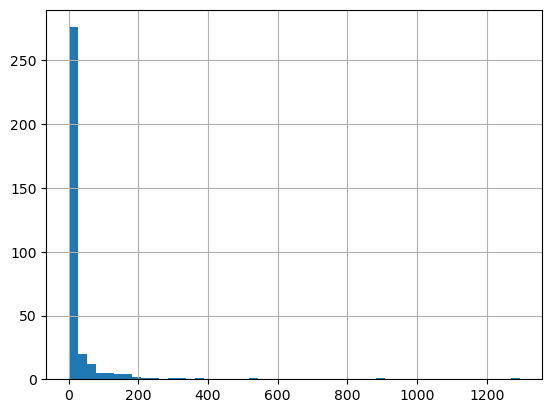

In [41]:
# code to generate the histogram with
ratings_count['nRatings'].hist(bins=50)

From the histogram we can see that **<span style='background:yellow'>\<Explain in your own words what you notice and what you decide on as the cut-off point, explain why></span>**

well this histogram makes that there are a lot of books with a low number of ratings. this is clear becouse there is a realy large bar netxt to the 0 value. x is the number of ratings and y is the number of books that have that amount of ratings. i think that i will take 75 as the cut off rating, this so that there are still enough books, but none with almost no ratings.

Finally we can create the code to perform a recommendation. First we can select one particular **<span style='background:yellow'>\<YOUR OBJECT></span>**

In [48]:
# code to select one field
corrs = book_pivot.corrwith(book_pivot['The Lovely Bones: A Novel']).sort_values(ascending=False)


C:\Users\jaimy\anaconda3\envs\stats4\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\jaimy\anaconda3\envs\stats4\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


And then to find the recommendation based on the correlations.

In [61]:
# code to create the recommendation
corrsDF = pd.DataFrame(corrs, columns=['Correlation'])
corrsDF.dropna(inplace=True)
corrsDF = corrsDF.sort_values('Correlation', ascending=False)

corrsDF = corrsDF.merge(ratings_count['nRatings'], on='Book-Title')

corrsDF[corrsDF['nRatings']>=75].head()

,Correlation,nRatings
Book-Title,,
The Lovely Bones: A Novel,1.000000,1295
The Jester,0.458123,80
The Girl Who Loved Tom Gordon : A Novel,0.419275,118
Back When We Were Grownups : A Novel (Ballantine Reader's Circle),0.418852,131
The King of Torts,0.386589,241


**<span style='background:yellow'>\<interpret the result></span>**

well, it would seem that there are not a lot of books that have a high correlation with the lovely bones. but this might be because there aro no books with as many reviews as that one so ill try another book. too double check. what can be concluded from this table is that the highest recommendation is: the jester. with a Correlation of 0.458

In [62]:
corrs = book_pivot.corrwith(book_pivot['The Da Vinci Code']).sort_values(ascending=False)
corrsDF = pd.DataFrame(corrs, columns=['Correlation'])
corrsDF.dropna(inplace=True)
corrsDF = corrsDF.sort_values('Correlation', ascending=False)

corrsDF = corrsDF.merge(ratings_count['nRatings'], on='Book-Title')

corrsDF[corrsDF['nRatings']>=75].head()

C:\Users\jaimy\anaconda3\envs\stats4\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\jaimy\anaconda3\envs\stats4\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation,nRatings
Book-Title,,
The Da Vinci Code,1.000000,883
A Kiss of Shadows (Meredith Gentry Novels (Paperback)),0.755747,81
Manhattan Hunt Club,0.488891,111
Lightning,0.443949,134
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,0.389716,171


this book does seem the have one book that has a high correlation with it. A Kiss of the Shadows has a Correlation of 0.756 so this would be a good recomendation for someone who likes the Da Vinci Code.

It might be nice to have one simple function that could do all the work for us. It should have as input parameters a dataframe, specific field, and minimum number of ratings, and then returns the recommendation.

Note that you should first select the fields that meet the minimum number of ratings, and then perform the correlation matrix, etc.

In [69]:
# code for a python function
def recommend(df, field, min_ratings):
    # code to make a dataframe with the unique objects, their average score and the number of scores
    ratings_count = pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].mean())
    ratings_count['nRatings'] = pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].count())
    ratings_count.sort_values(by=['nRatings'], ascending=False).head(10000)

    book_pivot = df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
    corrs = book_pivot.corrwith(book_pivot[field]).sort_values(ascending=False)
    corrsDF = pd.DataFrame(corrs, columns=['Correlation'])
    corrsDF.dropna(inplace=True)
    corrsDF = corrsDF.sort_values('Correlation', ascending=False)

    corrsDF = corrsDF.merge(ratings_count['nRatings'], on='Book-Title')

    return corrsDF[corrsDF['nRatings']>=min_ratings].head()


this function takes a dataframe, a field and a minimum number of ratings. it then returns the top 5 books that have a high correlation with the field. it does this by first creating a pivot table, then it calculates the correlation between the field and the other books. it then creates a dataframe with the correlation and drops the NaN values. it then sorts the values by correlation. it then merges the dataframe with the number of ratings and returns the top 5 books that have a high correlation with the field.

it is worth noting that this function does assume that the dataframe tha you feed it contains the index: User-ID, columns: Book-Title and values: Book-Rating. to make this function more universal you could add a few more parameters to the function that would allow you to change the index, columns and values.

Lets test the function:

In [70]:
# code to test the function
recommend(df, 'Harry Potter and the Order of the Phoenix (Book 5)', 75)

C:\Users\jaimy\anaconda3\envs\stats4\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\jaimy\anaconda3\envs\stats4\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation,nRatings
Book-Title,,
Harry Potter and the Order of the Phoenix (Book 5),1.000000,334
Bridget Jones's Diary,0.957280,130
The Notebook,0.574835,116
The King of Torts,0.543860,241
The Boy Next Door,0.498496,107


Here we can conclude that Harry Potter and the Order of the Phoenix (Book 5) has a high correlation with Bridget Jones's Diary wit a Correlation of 0.956 this is actually really high.

<font size="5"><center>-----Chapters 1 is required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However no template is available for these chapters. You will have to create it yourself.
    ----</center></font>

# 2. Negative correlations

The recommenders so far used, are looking at what if I give a high rating for this, what do you then recommend me. But how about if I give a low rating for something, what would you then recommend me?

Explain how and why your solution works, and how to interpret the results.

# 3. Content Based

Add a chapter showing how a basic content based recommender might work. A starting point for this might be https://www.datacamp.com/community/tutorials/recommender-systems-python (at about 1/3 of the page it starts explaining this in the section called ‘Content based’.

# 4. User Based

Add a chapter showing how a basic user based recommender might work. A starting point for this might be https://realpython.com/build-recommendation-engine-collaborative-filtering/

# 5. Combination

Combine two or more recommendation techniques to get an even better recommendation